# Linear Regression from Scratch

## Simple 1-Dimensional Data for Easy Visualization

#### Author: Victor Nascimento Ribeiro - January 2024

For a detailed explanation of the functions, please refer to the `linear_regression.py` file.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from linear_regression import linear_regression

### Plotting function

In [2]:
def show_graph(x, y, w=None, line=False):
    # plot graph
    plt.figure(figsize=(10, 6))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.ylim(-140, 140)
    plt.xlim(-100, 100)
    plt.scatter(X[:,0], y)
    
    # plot line
    if line == True:
        x_line = np.arange(-100, 100)
        y_line =  w[1] * x_line + w[0]
        plt.plot(x_line, y_line, c='red')

## Creating a random training set

- Our training set consists of $N = 50$ random points in $[-100, 100] \times [-130, 130] \subseteq \mathbb{R}^2$ region.

- Let us fix a function $f(x) = ax$, where $a$ is a random number $a \in [0, 1]$.

- Let's introduce a linear relation between $x$ and $y$ around $y = ax$ by setting $y_i = x_i + b_i$, where $b_i$ is a random number $b_i \in [-30, 30]$.

In [3]:
N = 50 # number of points

# force a linear relation between x and y
a = np.random.rand()
b = np.random.uniform(-30, 30, N)

X = np.random.uniform(-100, 100, N)
y = a*X + b

In [4]:
X = np.reshape(X, (-1,1)) # shape [50,] to [50,1] only because input data is d = 1

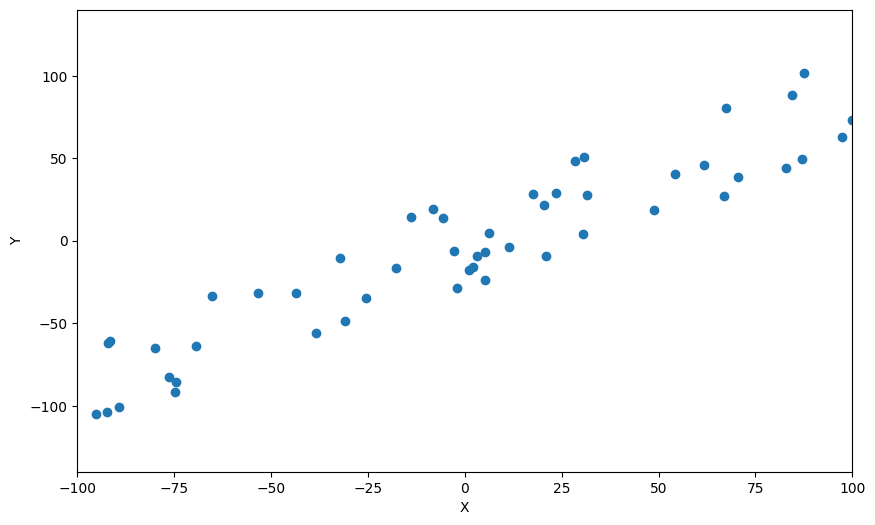

In [5]:
show_graph(X, y)

# Training

## Analytical solution

In [6]:
model = linear_regression()

model.fit_analytical(X, y)

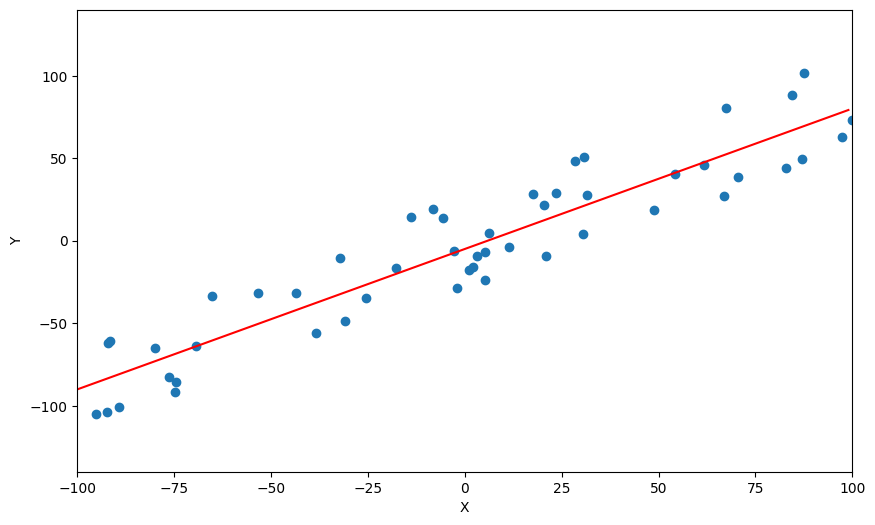

In [7]:
show_graph(X, y, model.w, line=True)

## Iterative solution (Gradient Descent)

In [8]:
model.fit(X, y, lr=0.0001, epochs=50)

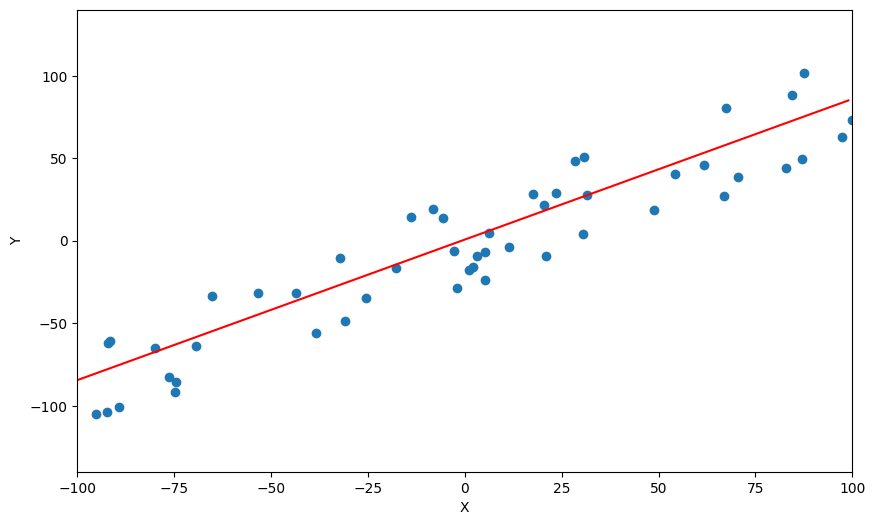

In [9]:
show_graph(X, y, model.w, line=True)

In [10]:
loss_history = model.loss_history

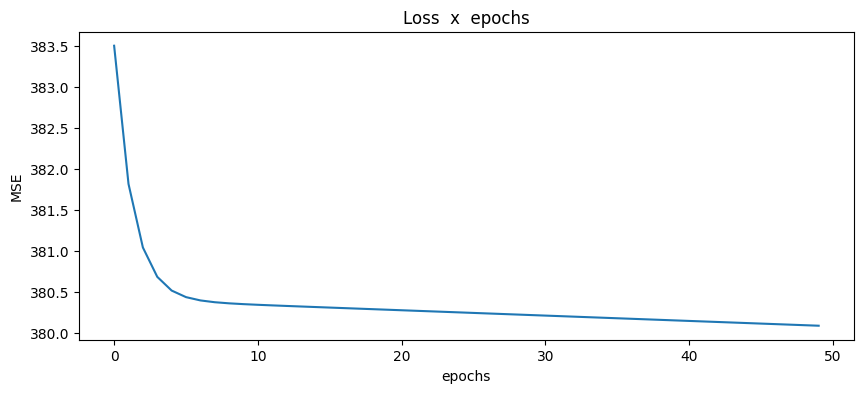

In [11]:
# plot loss
plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.title("Loss  x  epochs")
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.show()

# Testing

- Creating 10 random samples 

In [12]:
N_test = 10

X_test = np.random.uniform(-100, 100, N_test)
b_test = np.random.uniform(-30, 30, N_test)

y_test = a*X_test + b_test
X_test = np.reshape(X_test, (-1,1))

### Evaluate

In [13]:
r2, mse = model.evaluate(X_test, y_test)
print('MSE: ', mse)
print('R2: ', r2)

MSE:  191.96295825894828
R2:  0.9374217547116077


### Predict

In [14]:
point = [50]
point = np.reshape(point, (-1,1))

pred = model.predict(point)
print(f'prediction for {point[0]} is {pred}')

prediction for [50] is [43.28607992]


## References

 - https://work.caltech.edu/telecourse (lecture 3)
 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.